#### no ramp (top ramp, bottom no ramp)

status: optimal
Minimized Cost: $ 6577.06647071438


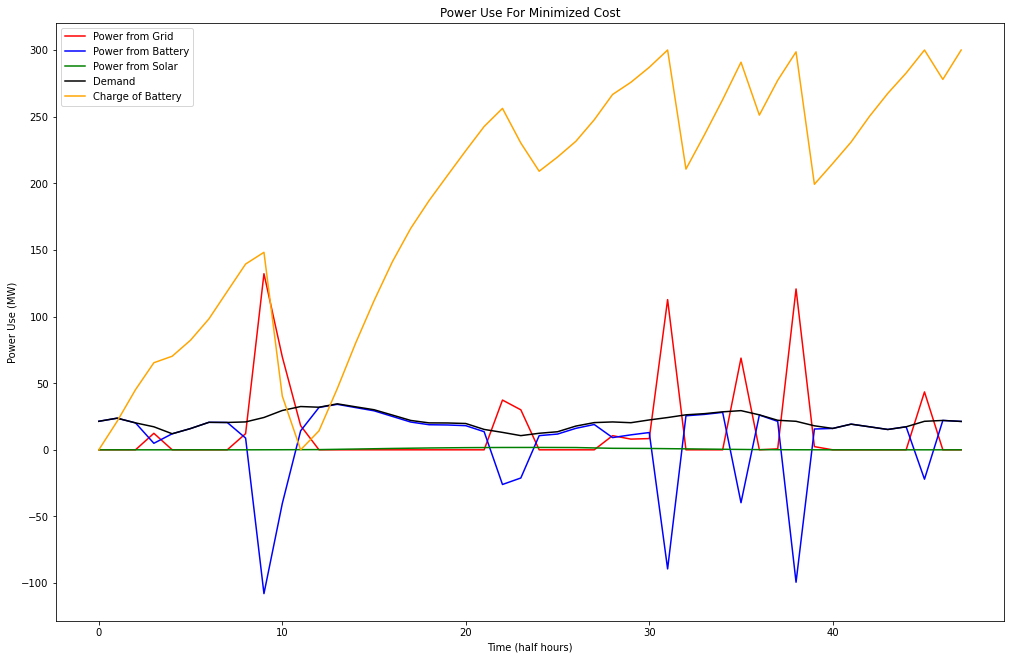

In [22]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']/50]

#defining ramp values
P_ramp = 240*24/t #[MW/time] (1200 MW/hr) 

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "DC MW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]      
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results 
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') # power
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery'); # battery
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') # solar
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

status: optimal
Minimized Cost: $ 6536.351362671701


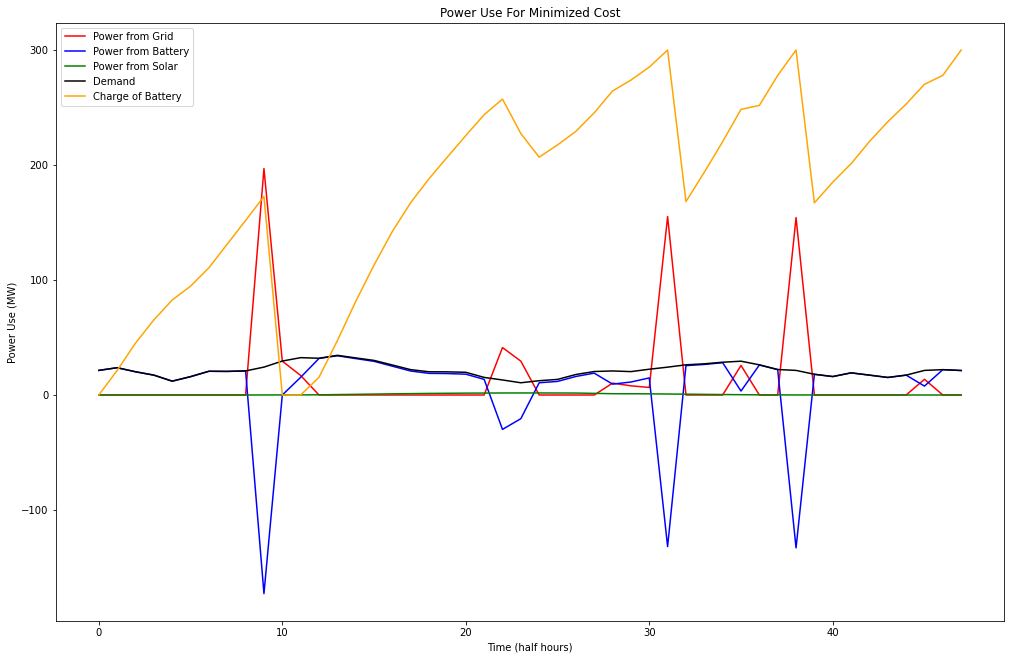

In [23]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']/50]

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "DC MW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]      
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results 
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') # power
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery'); # battery
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') # solar
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

#### Monthly Info

##### No battery or solar

status: optimal
Minimized Cost: $ 8411767.586678244


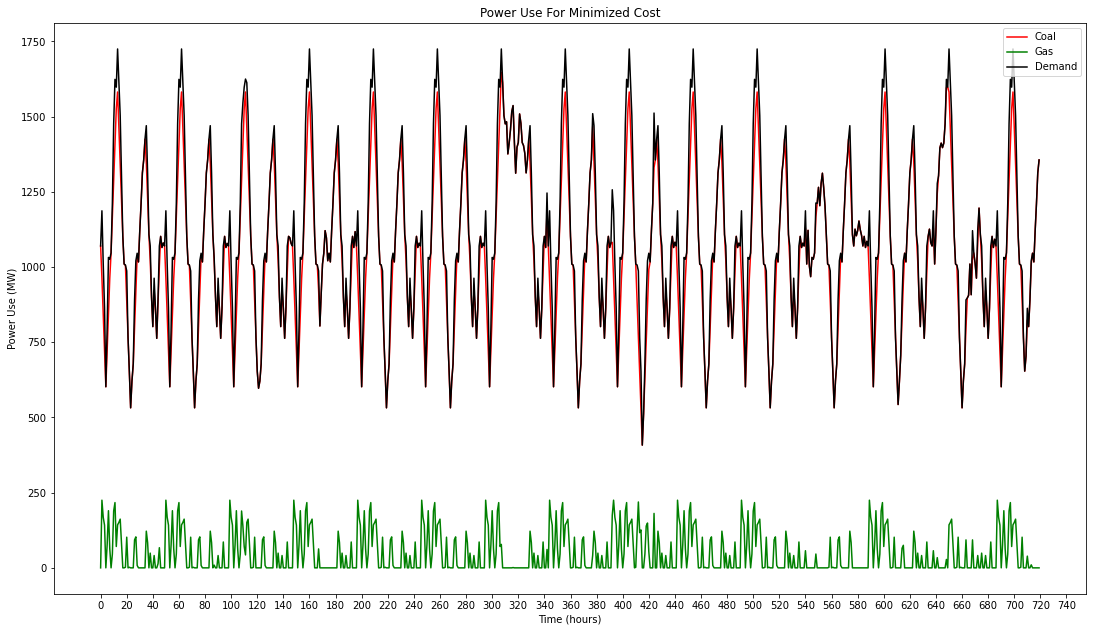

In [3]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 10.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp_g = 1200 #[MW/hr]
P_ramp_c = 120 #[MW/hr]

#defining power draw variables
P_g_1 = cp.Variable(t)
P_g_2 = cp.Variable(t)

#setting up cost functions ($/MW)
C_1 = []
C_2 = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_2 = C_2 + [df.at[n, "Gas"]*P_g_2[n]]
#C_1 = P_g_1**2 + 4*P_g_1 + 100 
#C_2 = 0.9*P_g_2**2 + 5*P_g_2 + 80

#setting up equation to minimize
objective = sum(C_1 + C_2)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_g_2 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_g_2] # two sources sum to load requirements
    
for n in range (0, t-1): # for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    c = P_g_2[n]
    d = P_g_2[n+1]
    constraints += [(a - b) <= P_ramp_c, (a - b) >= -P_ramp_c] # ramp value limits change in power draw from each source
    constraints += [(c - d) <= P_ramp_g, (c - d) >= -P_ramp_g] # ramp value limits change in power draw from each source
    n+1
   
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)
#print("optimal var", P_g_1.value, P_g_2.value)

#plotting the results
plt.plot(range(0,t), P_g_1.value, "red", label = 'Coal') # coal
plt.plot(range(0,t), P_g_2.value, "green", label = 'Gas'); # gas
plt.plot(range(0,t), P_L, "black", label = 'Demand'); # demand
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
plt.xticks(range(0,750,20))   # Put x axis ticks every 25 units.
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

##### No solar

status: optimal
Minimized Cost: $ 8282401.512509838


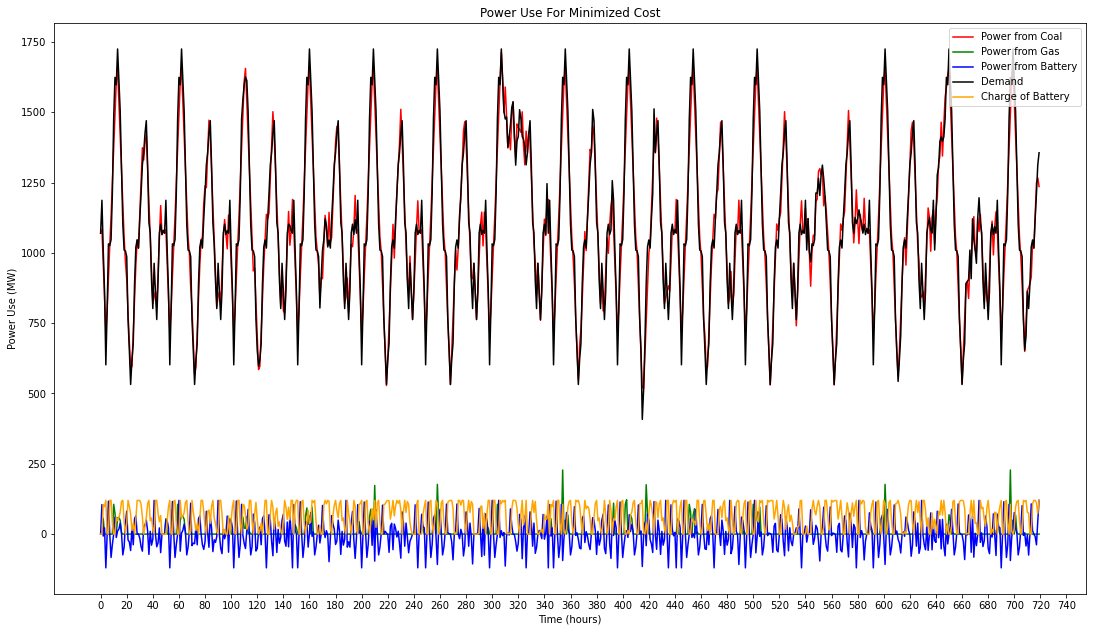

In [13]:
#E_b[t+1] = E_b[t] + P_b[t]
    #P_b pos when charging, negative when discharging
    #Battery charge: 0 to E_max, E[t] is charge within range
    
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 10.xlsx')
# print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp_g = 1200 #[MW/time] (1200 MW/hr) 
P_ramp_c = 120 #[MW/time] (120 MW/hr)

#defining capacity of battery (random)
E_max = 120 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_g_2 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change

#defining cost variables
C_1 = []
C_2 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_2 = C_2 + [df.at[n, "Gas"]*P_g_2[n]]
    C_b = C_b + [(min(df.at[n, "Coal"], df.at[n, "Gas"]))*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)
    
#setting up equation to minimize
objective = sum(C_1 + C_2)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_g_2 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_g_2 + P_b] # the sources sum to load requirements
    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    c = P_g_2[n]
    d = P_g_2[n+1]
    constraints += [(a - b) <= P_ramp_c, (a - b) >= -P_ramp_c] # ramp value limits change in power draw from each source
    constraints += [(c - d) <= P_ramp_g, (c - d) >= -P_ramp_g] # ramp value limits change in power draw from each source
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)
#print("optimal var", P_g_1.value, P_g_2.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Coal') # coal
plt.plot(range(0,t), P_g_2.value, "green", label = 'Power from Gas'); # gas
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery'); # battery
plt.plot(range(0,t), P_L, "black", label = 'Demand'); # demand
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')

plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
plt.xticks(range(0,750,20))   # Put x axis ticks every 25 units.
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


##### Solar + Battery

##### Solar june

status: optimal
Minimized Cost: $ 8207967.5256264275


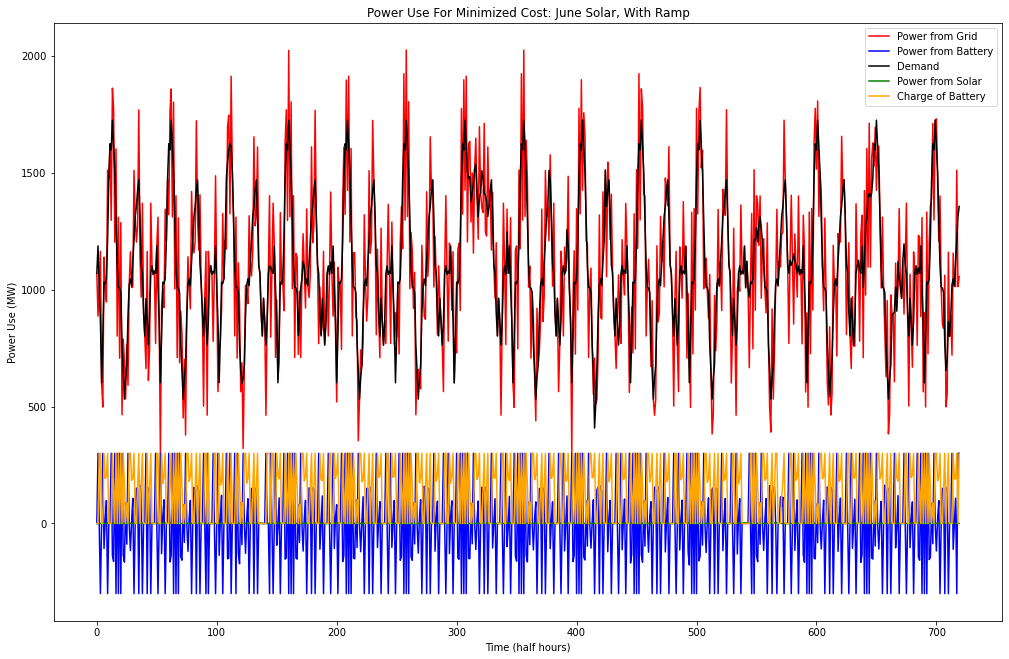

In [17]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 10.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 1200 #[MW/time] (1200 MW/hr) adjust based on time unit

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_j.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, With Ramp")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

#### solar dec

status: optimal
Minimized Cost: $ 8211037.3822871


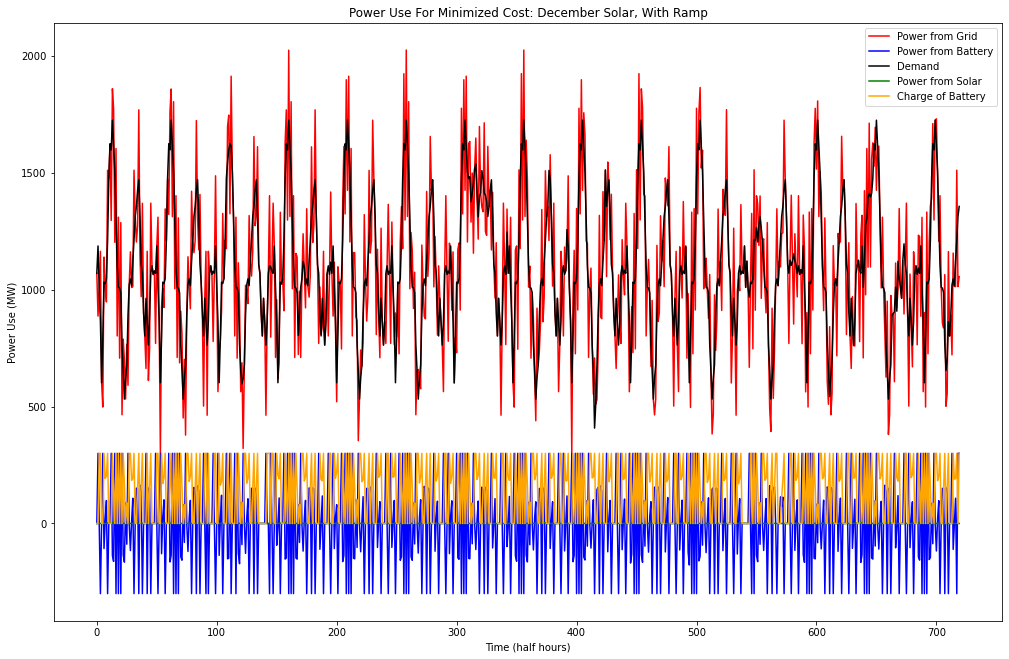

In [16]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 10.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 1200 #[MW/time] (1200 MW/hr) adjust based on time unit

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_d.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, With Ramp")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

#### Smaller Loads

#### june

status: optimal
Minimized Cost: $ 6306512.4542011535


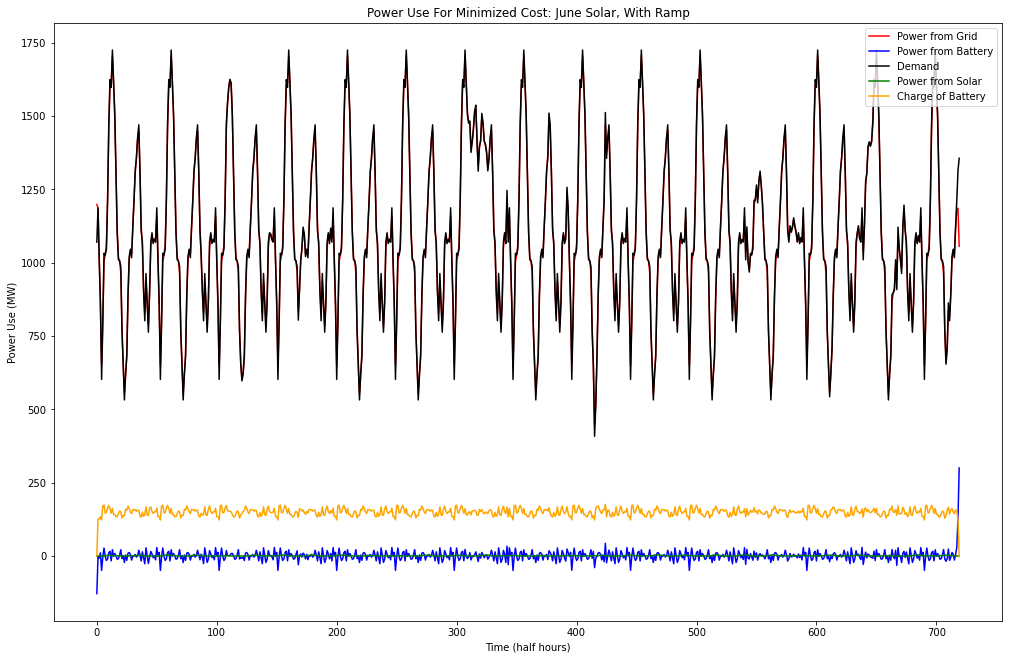

In [4]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 10.xlsx')
#print (df)
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 1200 #[MW/time] (1200 MW/hr) adjust based on time unit

#defining capacity of battery (random)
E_max = 300 # MW, randomly picked value

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#setting up cost functions
#if given a cost for the power by hour, multiply the power use by the cost (ensure units match) to get total cost per plant
#the rest of the code below would remain the same, just the cost equations + data input would change
#$/MW

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
#    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
#    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
     C_1 = C_1 + [8*P_g_1[n]]
     C_b = C_b + [8*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_j.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] - 0.98*P_b[n-1]]
    n+1    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, With Ramp")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

#### dec

status: optimal
Minimized Cost: $ 12130.445563613417


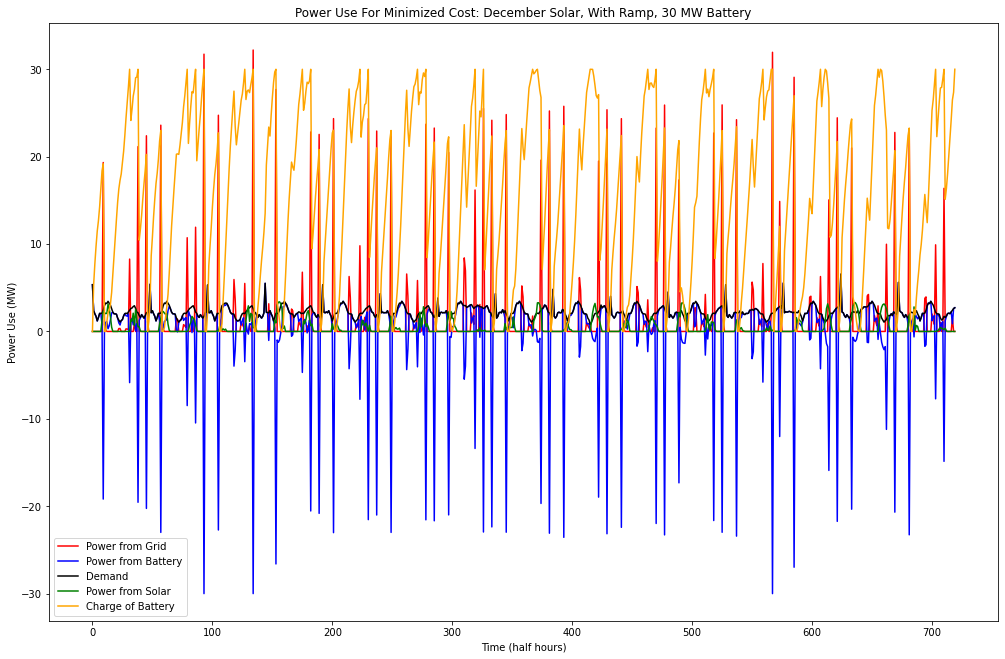

In [2]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mp

#defining time length
t = 720 #hours

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 10.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_R']]

#defining ramp values
P_ramp = 1200

#defining capacity of battery 
E_max = 30 

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_d.xlsx')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] # power draw is not negative 
constraints += [P_L == P_g_1 + P_b + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0]    
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1    
for n in range (0, t-1): #for each time step
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] # ramp value limits change in power draw from each source
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, With Ramp, 30 MW Battery")
leg = plt.legend()
fig = mp.pyplot.gcf()
fig.set_size_inches(17, 11)

#### battery charge plotting

##### ex 1: only 1 power source, using battery to select when to buy power

status: optimal
Minimized Cost: $ 534316.2938621055


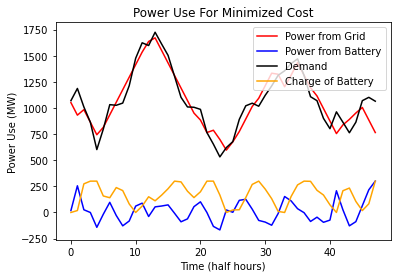

In [9]:
#importing
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#defining time length
t = 48

# defining load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 07.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]

#defining ramp values
P_ramp = 240*24/t 

#defining capacity of battery
E_max = 300

#defining power draw variables
P_g_1 = cp.Variable(t)
P_b = cp.Variable(t)

#defining cost variables
C_1 = []
C_b = []
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Coal"]*P_g_1[n]]
    C_b = C_b + [(df.at[n, "Coal"])*P_b[n]]
    
#establishing battery charge
E_b = cp.Variable(t+1)

#setting up equation to minimize
objective = sum(C_1)

#defining constraints
constraints = []
constraints += [P_g_1 >= 0] 
constraints += [P_L == P_g_1 + P_b] 
constraints += [E_b[0] == 0]

    
for n in range (0, t-1): 
    a = P_g_1[n]
    b = P_g_1[n+1]
    constraints += [(a - b) <= P_ramp, (a - b) >= -P_ramp] 
    n+1
for n in range (0, t):
    constraints += [E_b[n] >= 0, E_max >= E_b[n], E_max >= P_b[n], -P_b[n] >= -E_max] 
    n+1
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + P_b[n-1]]
    n+1
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

# printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# allowing me to plot the battery charge
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g_1.value, "red", label = 'Power from Grid') # power
plt.plot(range(0,t), P_b.value, "blue", label = 'Power from Battery'); # battery
plt.plot(range(0,t), P_L, "black", label = 'Demand'); # demand
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery'); # battery

plt.xlabel("Time (half hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost")
leg = plt.legend()